<a href="https://colab.research.google.com/github/velezcanizares/ETL_and_EDA/blob/main/ETL_%26_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Limpieza de datos con Python y Pandas
En casi todos los proyectos de analisis de datos se requiere en primera instancia limpiar y explorar estos para poder comenzar a trabajar con estos datos. En este notebook, se muestra un caso hipotético, donde se nos entrega una planilla, ésta proviene de los servicios contratados por una entidad bancaria, para que una empresa de marketing contacte telefónicamente a posibles clientes para determinar si están interesados o no en adquirir un servicio de deposito a plazo.

#1. El set de datos
La información recolectada por la empresa de mercadeo se encuentra en un archivo CSV (dataset_banco.csv) con 45215 filas y 17 columnas.

Cada registro contiene 16 características (las primeras 16 columnas) y una categoría ("yes" o "no" dependiendo de si la persona está o no interesada en adquirir el producto). Las columnas son:

1. "age":  edad (numérica)
2. "job": tipo de trabajo (categórica: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar","self-employed", "retired", "technician", "services") 
3. "marital": estado civil (categórica: "married", "divorced", "single")
4. "education": nivel educativo (categórica: "unknown", "secondary", "primary", "tertiary")
5. "default": si dejó de pagar sus obligaciones (categórica: "yes", "no")
6. "balance": saldo promedio anual en euros (numérica)
7. "housing": ¿tiene o no crédito hipotecario? (categórica: "yes", "no")
8. "loan": ¿tiene créditos de consumo? (categórica: "yes", "no")
9. "contact": medio a través del cual fue contactado (categórica: "unknown", "telephone", "cellular") 
10. "day": último día del mes en el que fue contactada (numérica)
11. "month": último mes en el que fue contactada (categórica: "jan", "feb", "mar", ..., "nov", "dec")
12. "duration": duración (en segundos) del último contacto (numérica)
13. "campaign": número total de veces que fue contactada durante la campaña (numérica)
14. "pdays": número de días transcurridos después de haber sido contactado antes de la campaña actual (numérica. -1 indica que no fue contactado previamente)
15. "previous": número de veces que ha sido contactada antes de esta campaña (numérica)
16. "poutcome": resultado de la campaña de marketing anterior (categórica: "unknown", "other", "failure", "success")
17. "y": categoría ¿el cliente se suscribió a un depósito a término? (categórica: "yes", "no")

#2. Una primera mirada al set de datos

In [1]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("/content/dataset_banco.csv")

In [3]:
print(data.shape)
data.head()

(45215, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no


Algo que es de suma importancia saber es que variables son categóricas y cuales son númericas.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45215 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45215 non-null  int64  
 1   job        45213 non-null  object 
 2   marital    45214 non-null  object 
 3   education  45214 non-null  object 
 4   default    45215 non-null  object 
 5   balance    45213 non-null  float64
 6   housing    45215 non-null  object 
 7   loan       45215 non-null  object 
 8   contact    45215 non-null  object 
 9   day        45215 non-null  int64  
 10  month      45215 non-null  object 
 11  duration   45214 non-null  float64
 12  campaign   45215 non-null  int64  
 13  pdays      45214 non-null  float64
 14  previous   45215 non-null  int64  
 15  poutcome   45215 non-null  object 
 16  y          45215 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 5.9+ MB


#3. Limpieza

Realizaremos el proceso de limpieza teniendo en cuenta las situaciones más comunes:

1. Datos faltantes en algunas celdas
2. Columnas irrelevantes (que no responden al problema que queremos resolver)
3. Registros (filas) repetidos
4. Valores extremos (*outliers*) en el caso de las variables numéricas. Se deben analizar en detalle pues no necesariamente la solución es eliminarlos
5. Errores tipográficos en el caso de las variables categóricas

Al final de este proceso de limpieza deberíamos tener un set de datos **íntegro**, listo para la fase de Análisis Exploratorio.

## 3.1 Datos faltantes

Acá comenzamos a ver que los datos no están completos, pues no todas las columnas tienen la misma cantidad de registros.

El número total de registros debería ser 45.215. Sin embargo columnas como "job", "marital", "education", "balance", "duration" y "pdays".

Por ser tan pocos los datos  faltantes optaremos por eliminar las filas correspondientes:

In [5]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45207 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45207 non-null  int64  
 1   job        45207 non-null  object 
 2   marital    45207 non-null  object 
 3   education  45207 non-null  object 
 4   default    45207 non-null  object 
 5   balance    45207 non-null  float64
 6   housing    45207 non-null  object 
 7   loan       45207 non-null  object 
 8   contact    45207 non-null  object 
 9   day        45207 non-null  int64  
 10  month      45207 non-null  object 
 11  duration   45207 non-null  float64
 12  campaign   45207 non-null  int64  
 13  pdays      45207 non-null  float64
 14  previous   45207 non-null  int64  
 15  poutcome   45207 non-null  object 
 16  y          45207 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 6.2+ MB


##3.2 Columnas irrelevantes

Una columna irrelevante puede ser:

- **Una columna que no contiene información relevante para el problema que queremos resolver**. Por ejemplo en este caso podría ser una columna que no guarde relación con el posible perfil del cliente (deporte favorito, hobbies, comida favorita, etc.)
- **Una columna categórica pero con un sólo nivel**. Por ejemplo si en la columna "job" solo tuviésemos el nivel "unknown".
- **Una columna numérica pero con un sólo valor**. Por ejemplo si en la columna "edad" todos los vlaores fuesen iguales a 50.
- **Columnas con información redundante**. Por ejemplo si además de las columnas "month" y "day" tuviésemos la columna "month-day", resultado de combinar las dos anteriores.

Si tenemos la duda de si alguna columna puede ser relevante o no lo mejor es dejarla (y más adelante en posteriores etapas podremos darnos cuenta de si se debe preservar o no).

En este caso todas las columnas pueden resultar relevantes, pero debemos verificar que no haya columnas categóricas con un sólo nivel, o columnas numéricas con un sólo valor:

In [6]:
# Conteo de los niveles en las diferentes columnas categóricas (las que tienen datos tipo object)
cols_cat = ['job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'poutcome', 'y']

for col in cols_cat:
  print(f'Columna {col}: {data[col].nunique()} subniveles')

Columna job: 18 subniveles
Columna marital: 6 subniveles
Columna education: 10 subniveles
Columna default: 2 subniveles
Columna housing: 2 subniveles
Columna loan: 6 subniveles
Columna contact: 5 subniveles
Columna month: 12 subniveles
Columna poutcome: 6 subniveles
Columna y: 2 subniveles


Todas las columnas categóricas tienen más de 1 subnivel. No eliminaremos ninguna.

Verifiquemos lo que ocurre con las columnas numéricas:

In [7]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000
mean,41.005596,1374.201318,15.806534,258.032539,2.763731,40.178225,0.580198
std,12.037399,3924.491665,8.323015,257.460759,3.098058,100.103283,2.303341
min,18.000000,-8019.000000,1.000000,-1389.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1427.500000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,776.000000,527532.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Todas las columnas numéricas tienen desviaciones estándar ("std") diferentes de cero, lo que indica que no tienen un único valor.

Preservaremos todas las columnas numéricas.

##3.3 Filas repetidas

In [8]:
print(f'Tamaño del set antes de eliminar las filas repetidas: {data.shape}')
data.drop_duplicates(inplace=True)
print(f'Tamaño del set después de eliminar las filas repetidas: {data.shape}')

Tamaño del set antes de eliminar las filas repetidas: (45207, 17)
Tamaño del set después de eliminar las filas repetidas: (45203, 17)


##3.4 *Outliers* en las variables numéricas

No siempre se deben eliminar los *outliers* porque dependiendo de la variable numérica analizada estos pueden contener información importante.

Creemos gráficas tipo "boxplot" de las columnas numéricas:

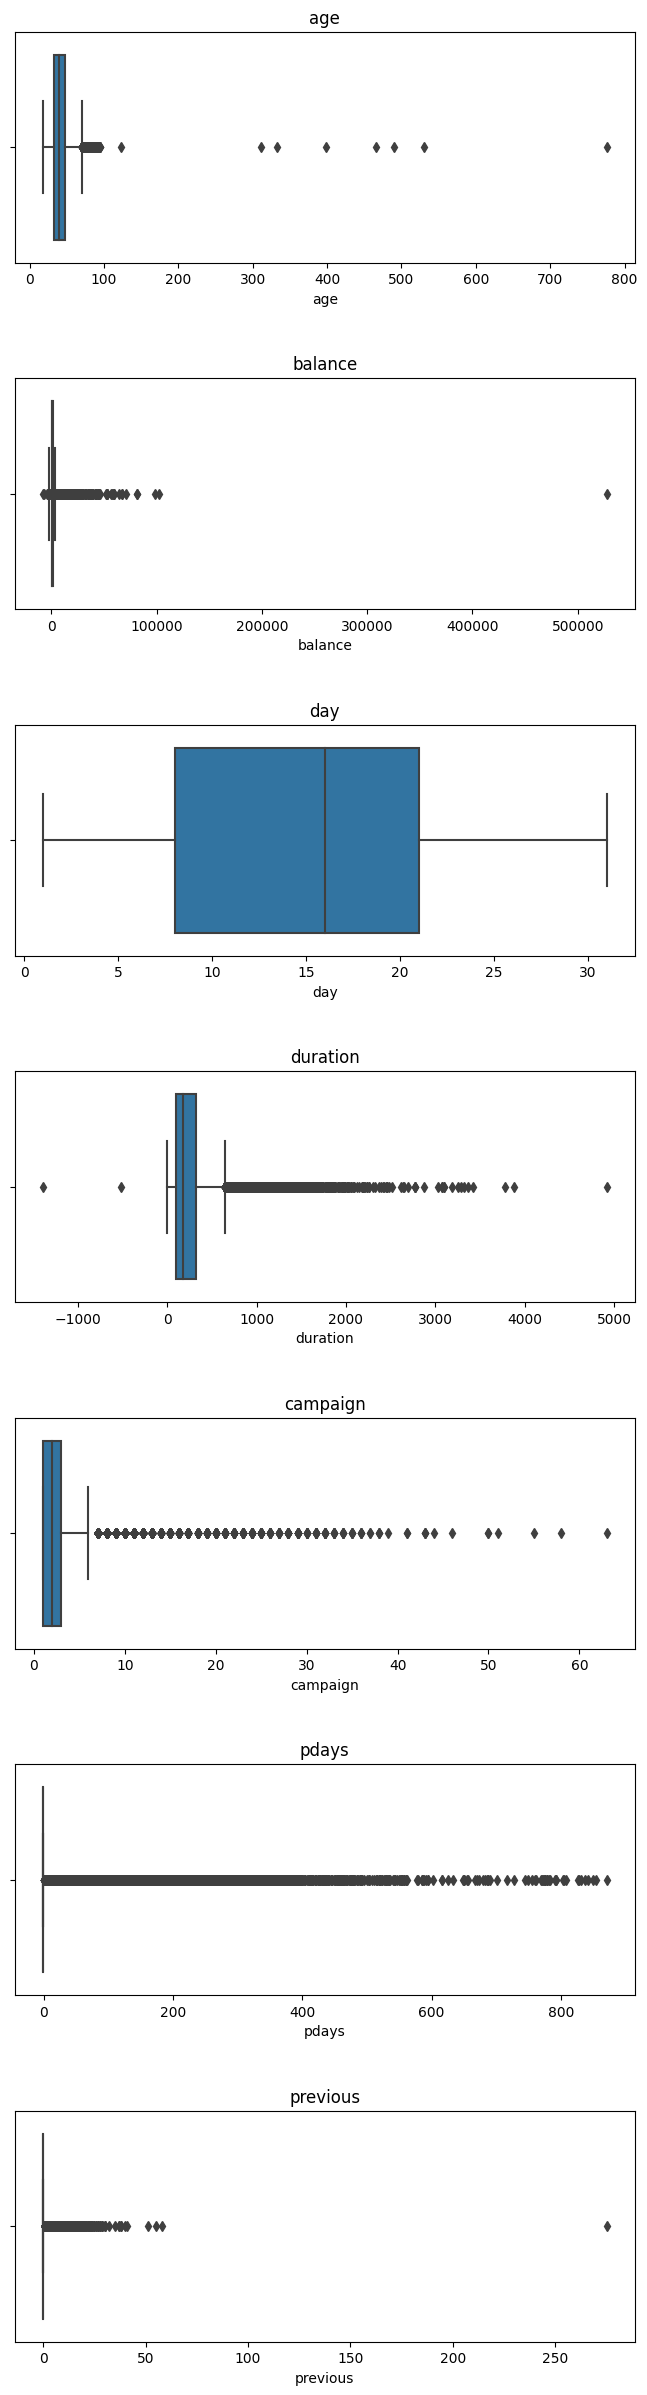

In [9]:
# Generar gráficas individuales pues las variables numéricas
# están en rangos diferentes
cols_num = ['age', 'balance', 'day', 'duration', 'campaign',
            'pdays', 'previous']

fig, ax = plt.subplots(nrows=7, ncols=1, figsize=(8,30))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=data, ax=ax[i])
    ax[i].set_title(col)

**Observaciones:**
- "age": hay sujetos con edades mucho mayores a 100 años
- "duration": hay valores negativos
- "previous": hay un valor extremadamente alto (cercano a 300)

In [10]:
# Eliminar filas con "age">100
print(f'Tamaño del set antes de eliminar registros de edad: {data.shape}')
data = data[data['age']<=100]
print(f'Tamaño del set después de eliminar registros de edad: {data.shape}')

Tamaño del set antes de eliminar registros de edad: (45203, 17)
Tamaño del set después de eliminar registros de edad: (45195, 17)


In [11]:
# Eliminar filas con "duration"<0
print(f'Tamaño del set antes de eliminar registros de duración: {data.shape}')
data = data[data['duration']>0]
print(f'Tamaño del set después de eliminar registros de duración: {data.shape}')

Tamaño del set antes de eliminar registros de duración: (45195, 17)
Tamaño del set después de eliminar registros de duración: (45190, 17)


In [12]:
# Eliminar filas con "previous">100
print(f'Tamaño del set antes de eliminar registros de previous: {data.shape}')
data = data[data['previous']<=100]
print(f'Tamaño del set después de eliminar registros de previous: {data.shape}')

Tamaño del set antes de eliminar registros de previous: (45190, 17)
Tamaño del set después de eliminar registros de previous: (45189, 17)


##3.5 Errores tipográficos en variables categóricas

En una variable categórica pueden aparecer sub-niveles como "unknown" y "UNK" que para nosotros son equivalentes pero que para nuestro programa parecerían diferentes.

Se deben unificar estos sub-niveles

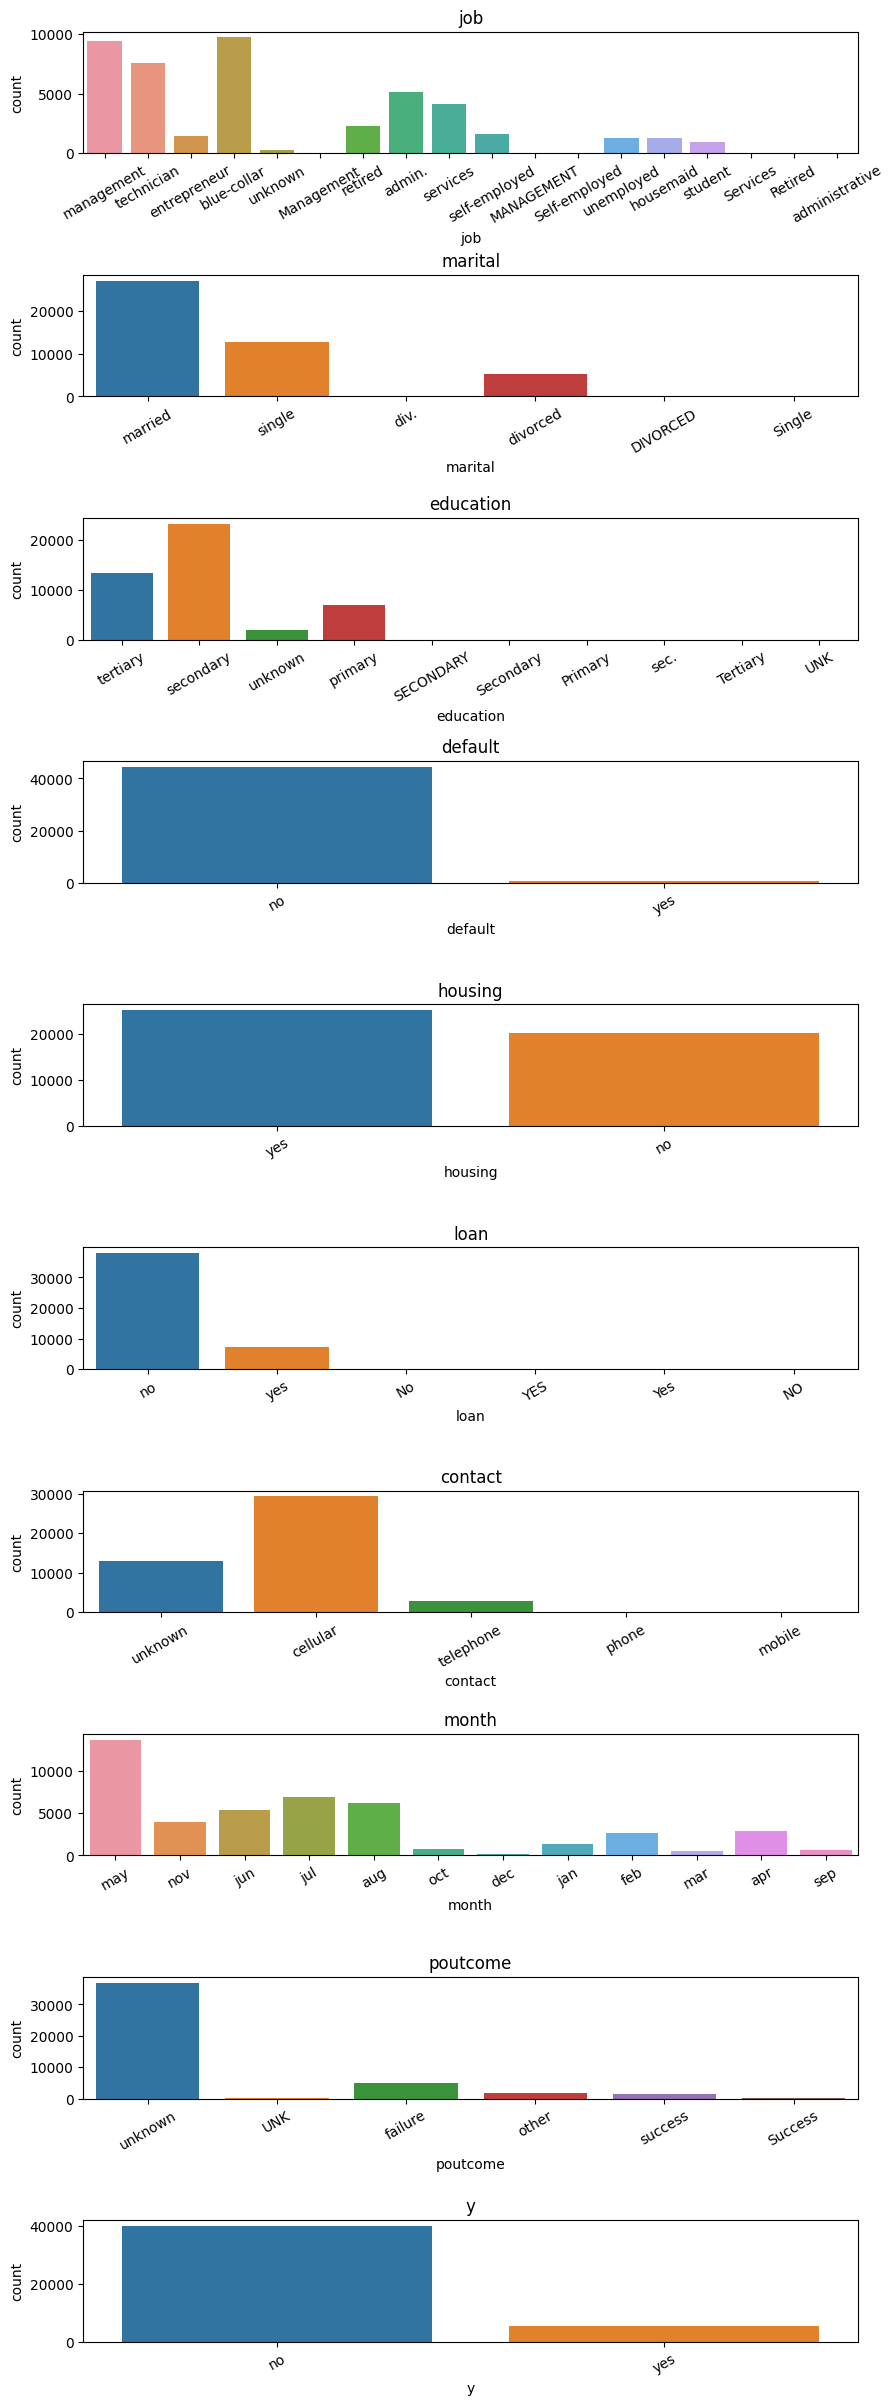

In [13]:
# Graficar los subniveles de cada variable categórica
cols_cat = ['job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'poutcome', 'y']

fig, ax = plt.subplots(nrows=10, ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_cat):
  sns.countplot(x=col, data=data, ax=ax[i])
  ax[i].set_title(col)
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)

en minúscula, en mayúscula o con la primera letra en mayúscula.

Unifiquemos estos sub-niveles inicialmente:

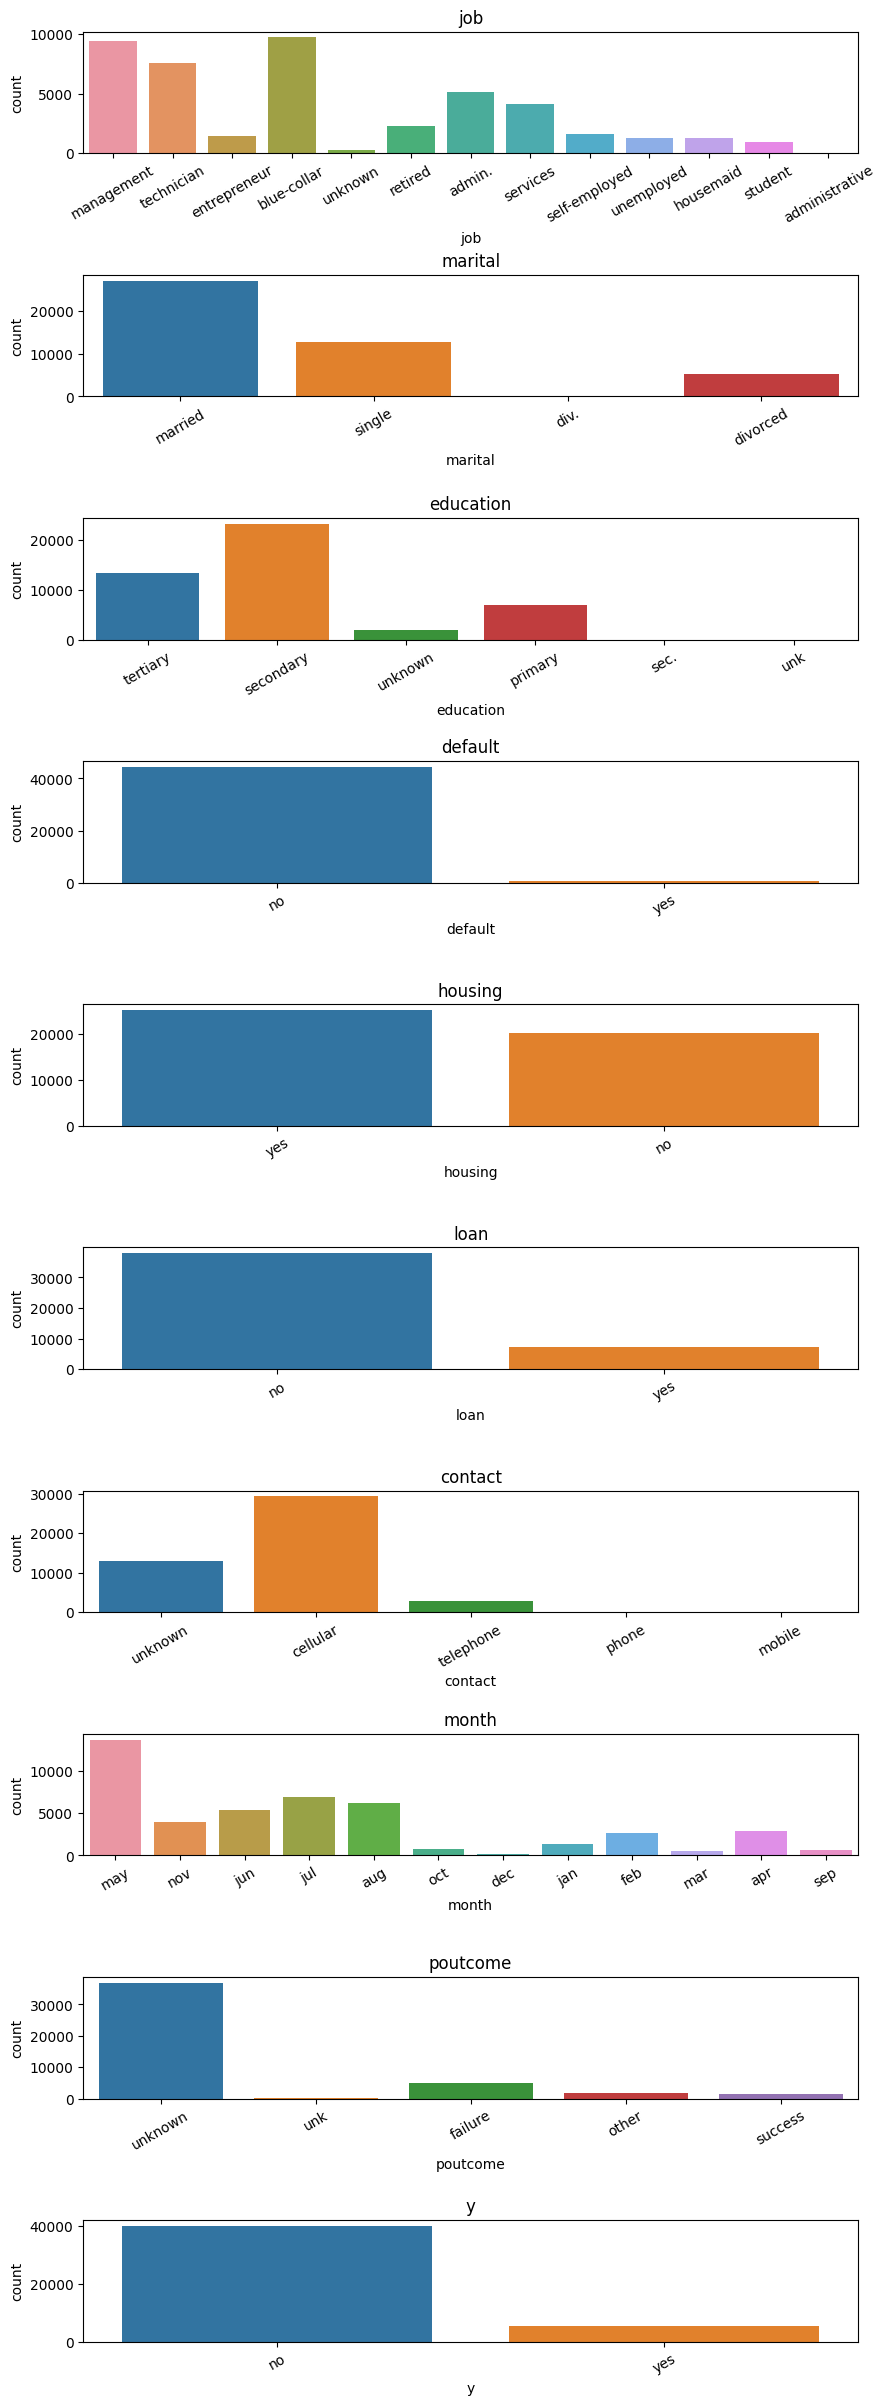

In [14]:
for column in data.columns:
    # Representar en minúsculas sólo si la columna es categórica
    if column in cols_cat:
        data[column] = data[column].str.lower()

# Y generemos las gráficas nuevamente
fig, ax = plt.subplots(nrows=10, ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_cat):
  sns.countplot(x=col, data=data, ax=ax[i])
  ax[i].set_title(col)
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)

Podemos ver como se van compactando algunos sub-niveles.

In [15]:
# job: unificar admin. y administrative
print(data['job'].unique())
data['job'] = data['job'].str.replace('admin.','administrative', regex=False)
print(data['job'].unique())

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student' 'administrative']
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'administrative' 'services' 'self-employed' 'unemployed'
 'housemaid' 'student']


In [16]:
print(data['marital'].unique())
data['marital'] = data['marital'].str.replace('div.','divorced', regex=False)
print(data['marital'].unique())

['married' 'single' 'div.' 'divorced']
['married' 'single' 'divorced']


In [17]:
# education: unificar sec. y secondary, unk y unknown
print(data['education'].unique())
data['education'] = data['education'].str.replace('sec.','secondary', regex=False)
data.loc[data['education']=='unk','education'] = 'unknown'
print(data['education'].unique())

['tertiary' 'secondary' 'unknown' 'primary' 'sec.' 'unk']
['tertiary' 'secondary' 'unknown' 'primary']


In [18]:
# contact: unificar telephone y phone
print(data['contact'].unique())
data.loc[data['contact']=='phone','contact'] = 'telephone'
data.loc[data['contact']=='mobile','contact'] = 'cellular'
print(data['contact'].unique())

['unknown' 'cellular' 'telephone' 'phone' 'mobile']
['unknown' 'cellular' 'telephone']


In [19]:
# poutcome: unificar unk y unknown
print(data['poutcome'].unique())
data.loc[data['poutcome']=='unk','poutcome']='unknown'
print(data['poutcome'].unique())

['unknown' 'unk' 'failure' 'other' 'success']
['unknown' 'failure' 'other' 'success']


In [20]:
data.shape

(45189, 17)

¡Y listo, ya hemos realizado la limpieza de nuestro set de datos!

Originalmente tenía 45.215 registros y 17 columnas. El dataset resultante tiene 45.189 filas (26 menos) y 17 columnas.

El set de datos ya está listo para el Análisis Exploratorio.

In [21]:
from google.colab import files

# Exporta el DataFrame a un archivo CSV
data.to_csv('dataset_banco_clean.csv', index=False)

# Descarga el archivo CSV a tu computadora local
files.download('dataset_banco_clean.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Análisis exploratorio de datos
Uno de los pasos fundamentales dentro de los proyectos de análisis y ciencia de datos, aparte de la limpieza es el ánalisis exploratorio.

La idea es usar herramientas estadísticas y de visualización para:

- Crear un mapa mental del set de datos (entenderlo)
- Empezar a encontrar respuestas a la pregunta planteada inicialmente (¿qué perfil tienen los clientes con mayor potencial de conversión?)

Llevaremos a cabo estas fases:

1. Análisis de cada variable de manera individual
2. Análisis univariado: relación de cada variable predictora con la variable a predecir
3. Análisis bivariado: relación de pares de variables predictoras con la variable a predecir

### 1 Análisis de cada variable de manera individual

In [22]:
print(data.shape)
data.head()

(45189, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45189 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45189 non-null  int64  
 1   job        45189 non-null  object 
 2   marital    45189 non-null  object 
 3   education  45189 non-null  object 
 4   default    45189 non-null  object 
 5   balance    45189 non-null  float64
 6   housing    45189 non-null  object 
 7   loan       45189 non-null  object 
 8   contact    45189 non-null  object 
 9   day        45189 non-null  int64  
 10  month      45189 non-null  object 
 11  duration   45189 non-null  float64
 12  campaign   45189 non-null  int64  
 13  pdays      45189 non-null  float64
 14  previous   45189 non-null  int64  
 15  poutcome   45189 non-null  object 
 16  y          45189 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 6.2+ MB


Las variables de tipo object son categóricas

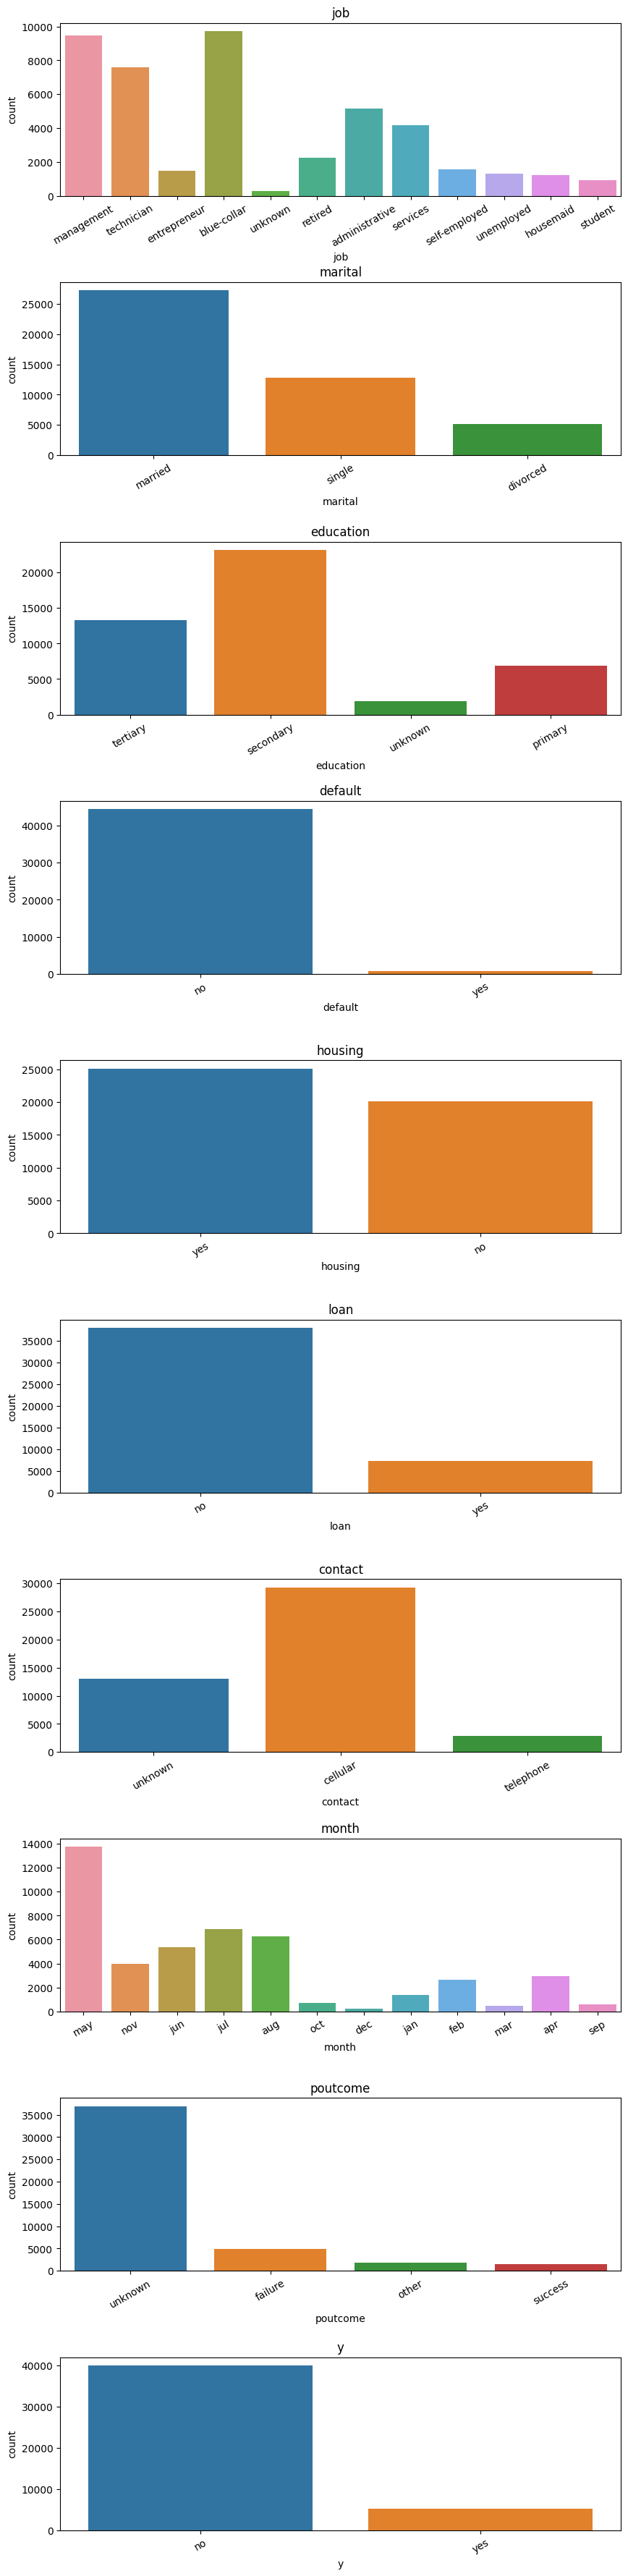

In [24]:
# Tomemos las variables categóricas y generemos gráficos de barras

col_cat = ['job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'poutcome', 'y']

# Gráficos de barras de conteo
fig, ax = plt.subplots(nrows=len(col_cat), ncols=1, figsize=(10,45))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(col_cat):
  sns.countplot(x=col, data=data, ax=ax[i])
  ax[i].set_title(col)
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)

Observaciones:

Niveles de cada variable de interés:

- 'job': 12
- 'marital': 3 (married, single, divorced)
- 'education': 4 (primary, secondary, tertiary, unknown)
- 'default': 2 (Yes, No). En este caso la gran mayoría de contactados tienen valores 'No'
- 'housing': 2 (Yes, No). En este caso el set está relativamente balanceado.
- 'loan': 2 (Yes, No). En este caso la gran mayoría contiene valores 'No'.
- 'poutcome': 4 (unknown, failure, other, success). La gran mayoría está en el nivel 'unknown'
- 'y': 2 (No, Yes). La gran mayoría está en el nivel 'No'. Si mas adelante se implemente algún modelo predictivo con Machine Learning se debe tener en cuenta este desbalance.

In [25]:
# Eliminemos las columnas "contact", "month", "day", "duration", "campaign",
# "pdays" y "previous" pues no aportan información sobre el cliente

data.drop(columns=['contact','month', 'day', 'duration', 'campaign', 'pdays',
                   'previous'],inplace=True)
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'poutcome', 'y'],
      dtype='object')

Veamos inicialmente el comportamiento de las variables numéricas ('age' y 'balance')

In [26]:
# Podemos extraer algunas variables estadísticas descriptivas básicas
data.describe()

,age,balance
count,45189.000000,45189.000000
mean,40.936445,1374.012149
std,10.618502,3924.370039
min,18.000000,-8019.000000
25%,33.000000,72.000000
50%,39.000000,448.000000
75%,48.000000,1428.000000
max,95.000000,527532.000000


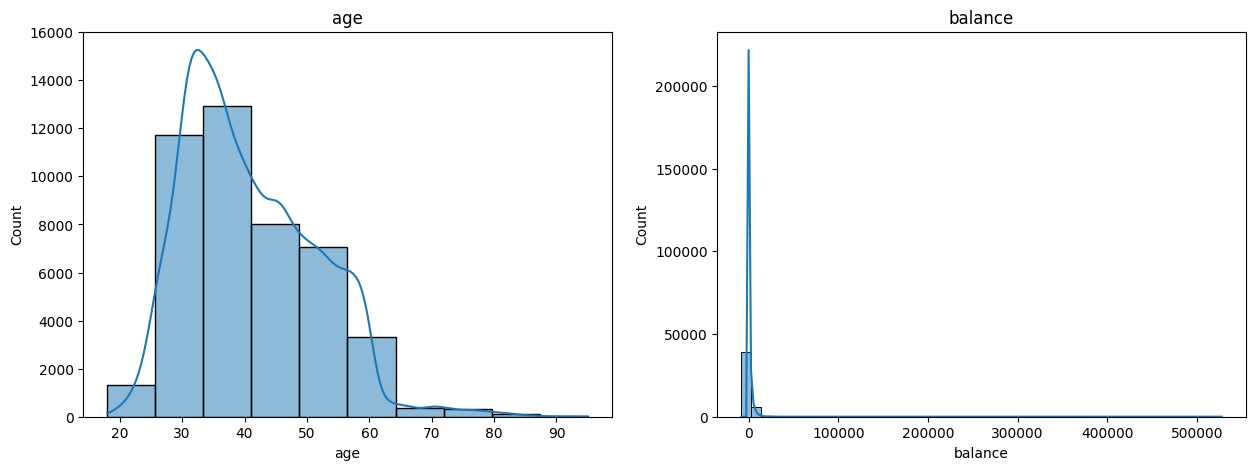

In [27]:
# Pero muchas veces es más útil graficar dichas variables

# Dibujar histogramas
col_num = ['age', 'balance']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(col_num):
    if col == 'age':
        nbins = 10
    else:
        nbins = 50
    sns.histplot(x=col, data=data, ax=ax[i], bins=nbins, kde = True)
    ax[i].set_title(col)

In [28]:
# Veamos en detalle lo que ocurre con balance
data['balance'].describe()

count     45189.000000
mean       1374.012149
std        3924.370039
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      527532.000000
Name: balance, dtype: float64

**Observaciones:**

- La mayor parte del grupo contactado tiene edades entre los 30 y los 50 años, con sesgo hacia los 30-40 años
- La mayor parte del grupo contactado (75%) tiene saldos o negativos o que no superan los 1500 euros aproximadamente.

##2 Análisis univariado

Teniendo claras algunas características generales de cada dato individual, la idea ahora es analizar si existe alguna relación entre las posibles variables predictoras ('age', 'balance', 'job', 'marital', 'education', etc.) y la variable a predecir ('y').

Esto se conoce como análisis univariado. 

Sin embargo, este análisis nos mostrará sólo una faceta de las posibles relaciones entre una cada variable predictora y la variable a predecir, y no es suficiente para extraer conclusiones definitivas.

In [29]:
# 'yes' = 1, 'no' = 0
diccionario = {'yes':1, 'no':0}
binario = data['y'].map(diccionario)
data['y_bin'] = binario

# De esta forma resulta fácil calcular la tasa de conversión: el promedio de la columna 'y_bin'

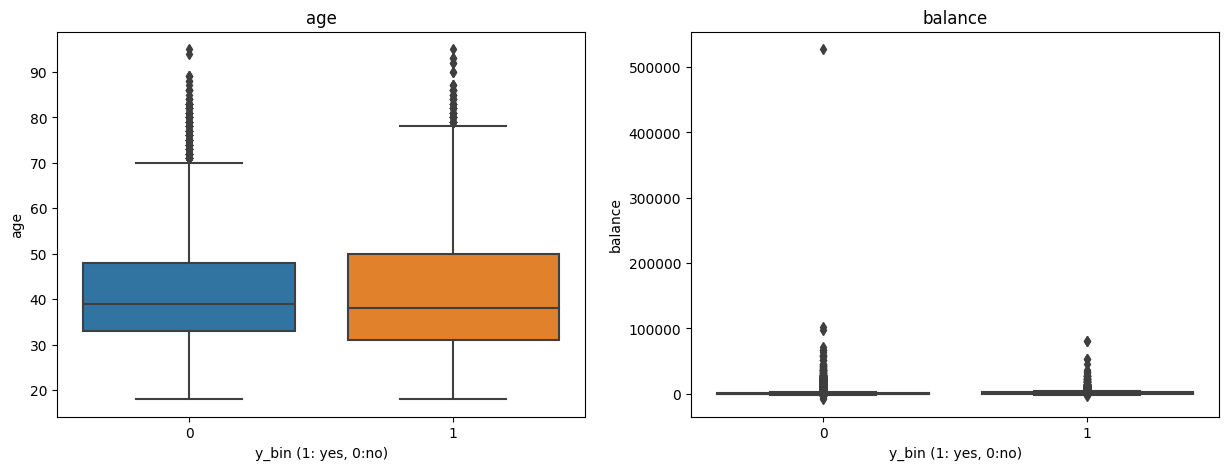

In [30]:
# Analizar la relación entre las variables numéricas y la variable a predecir ('y')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
fig.subplots_adjust(hspace=.25)

for i, col in enumerate(col_num):
  bplt = sns.boxplot(x="y_bin", y=col, data=data, ax=ax[i])
  ax[i].set_xlabel('y_bin (1: yes, 0:no)')
  ax[i].set_title(col)

**Observaciones:**
- Ni en 'age' ni en 'balance' se observan diferencias entre las personas que adquirieron o no el producto.
- Al parecer las variables numéricas no resultan en principio siendo variables predictivas.

Sin embargo estas variables numéricas se encuentran en un amplio rango.

Podemos calcular las tasas de conversión definiendo intervalos para estas variables numéricas y ver si podemos extraer información relevante de ese análisis:

In [31]:
# Función para graficar tasas de conversión

def graficar_tasas_conversion(var_predictora, var_predecir, type='line', order=None):
    x, y = var_predictora, var_predecir

    # Generar agrupaciones (groupby), calcular tasa de conversión (mean),
    # multiplicarla por 100 (mul(100))
    grupo = data.groupby(x)[y].mean().mul(100).rename('tasa_conv').reset_index()

    # Y generar gráfica
    if type=='line': # Útil para rangos continuos
        plt.figure(figsize=(10,6))
        sns.lineplot(x=var_predictora, y='tasa_conv', data=grupo)
        plt.grid()
    elif type=='bar': # Útil si los datos están divididos en rangos o son categóricos
        plt.figure(figsize=(14,6))
        sns.barplot(x=var_predictora, y='tasa_conv', data=grupo, order=order)
        plt.grid()
    elif type=='scatter': # Útil si los datos están divididos en rangos o son categóricos
        plt.figure(figsize=(10,6)) 
        sns.scatterplot(x=var_predictora, y='tasa_conv', data=grupo)
        plt.grid()

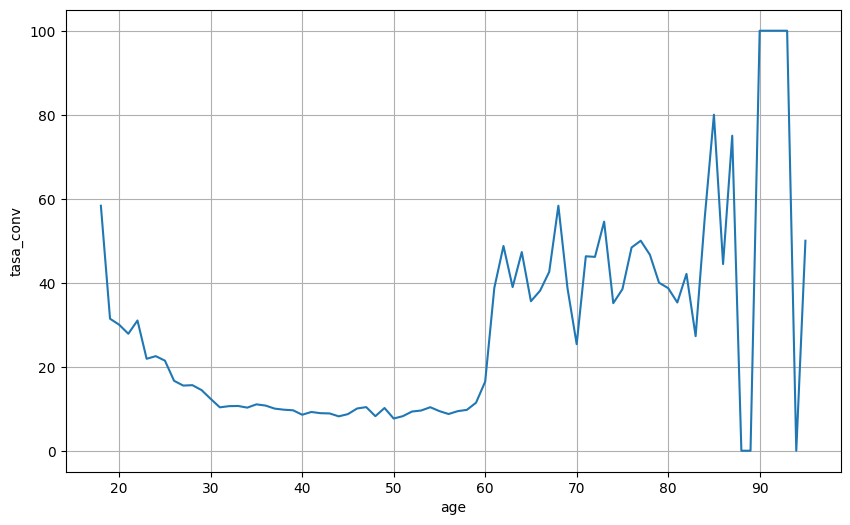

In [32]:
# Y graficar las tasas de conversión para la variable edad
graficar_tasas_conversion('age','y_bin')

**Observaciones:**

- En este caso SÍ se observan diferencias en las tasas de conversión por edad
- Podríamos establecer tres rangos aproximados: 18-25 años, 26-59 años y 60 años en adelante

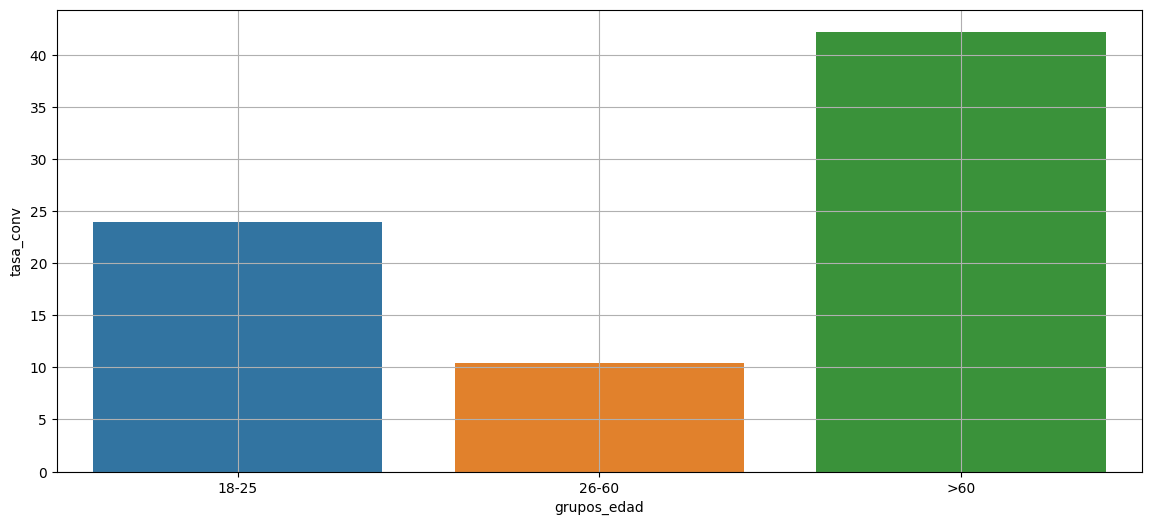

In [33]:
# Creemos subbrupos de edades y calculemos las tasas de conversión en cada caso

# Nueva columna en el dataset: "grupos_edad"
data.loc[:,'grupos_edad'] = "18-25"
data.loc[data['age']>60,'grupos_edad'] = ">60"
data.loc[(data['age']>25)&(data['age']<=60), 'grupos_edad'] = "26-60"

# Y grafiquemos la tasa de conversión para esta nueva columna
graficar_tasas_conversion('grupos_edad','y_bin',type='bar')

**Observaciones:**

- Tenemos 3 rangos de edad bastante diferenciados y para los cuales se alcanzan diferentes tasas de conversión: 18-25 años (24%), 26-60 años (11%), más de 60 años (43%)

In [34]:
# Y eliminemos la columna "age" (dejando sólo los grupos de edad)
data.drop(columns=['age'], inplace=True)

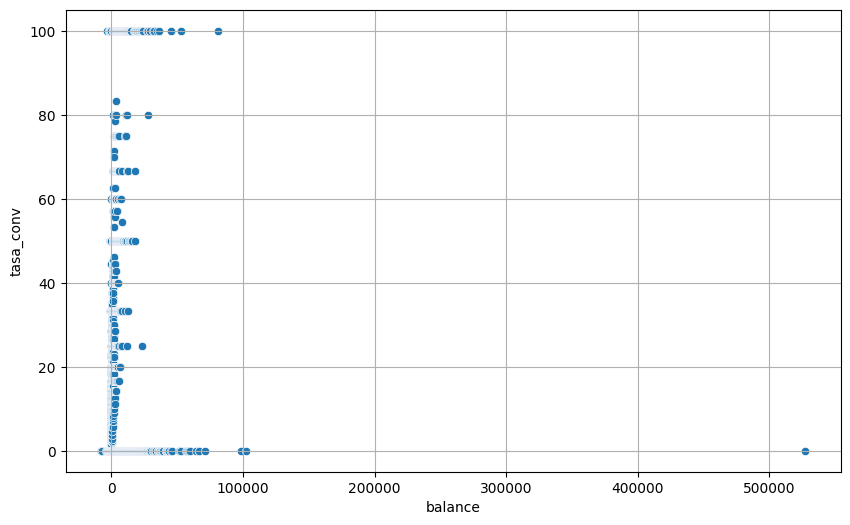

In [35]:
# Realicemos el mismo análisis pero para la variable 'balance'
graficar_tasas_conversion('balance','y_bin',type='scatter')

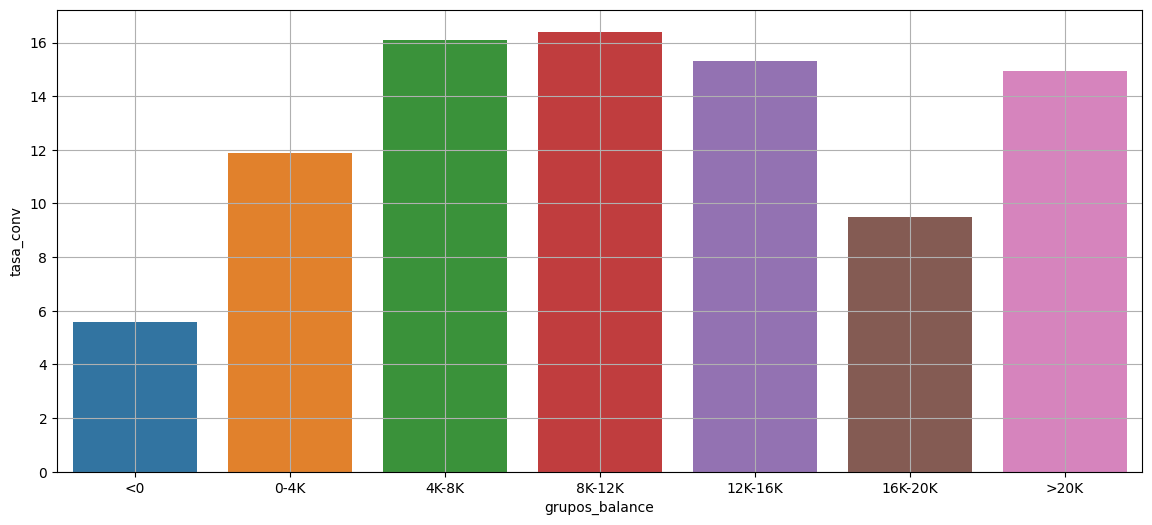

In [36]:
# No resulta fácil ver un patrón. Al igual que con la edad generemos
# diferentes rangos:
# <0
# 0-4000
# 4000-8000
# 8000-12000
# 12000-16000
# 16000-20000
# >20000

# Nueva columna en el dataset: "grupos_balance"
data.loc[:,'grupos_balance'] = "<0"
data.loc[(data['balance']>=0) & (data['balance']<4000),'grupos_balance'] = "0-4K"
data.loc[(data['balance']>=4000) & (data['balance']<8000),'grupos_balance'] = "4K-8K"
data.loc[(data['balance']>=8000) & (data['balance']<12000),'grupos_balance'] = "8K-12K"
data.loc[(data['balance']>=12000) & (data['balance']<16000),'grupos_balance'] = "12K-16K"
data.loc[(data['balance']>=16000) & (data['balance']<20000),'grupos_balance'] = "16K-20K"
data.loc[data['balance']>=20000,'grupos_balance'] = ">20K"

# Y grafiquemos la tasa de conversión para esta nueva columna
#graficar_tasas_conversion('grupos_balance','y_bin',type='bar')
orden = ['<0', '0-4K', '4K-8K', '8K-12K', '12K-16K', '16K-20K', '>20K']
graficar_tasas_conversion('grupos_balance','y_bin',type='bar', order=orden)

**Observaciones:**

- Al parecer hay un patrón. Si organizamos las barras de forma ascendente observamos:
    - <0: 6%
    - 0-4K: 12%
    - 4K-8K: 16%
    - 8K-12K: 16%
    - 12K-16K: 15%
    - 16K-20K: 9%
    - Mayor a 20K: 15%

- Exceptuando el rango 16K-20K, en general un mayor nivel de liquidez genera una mayor tasa de conversión.
- Podríamos definir 4 rangos de interés para simplificar el análisis:
  - 0-4K
  - 4K-16K
  - 16K-20K
  - Mayor a 20K

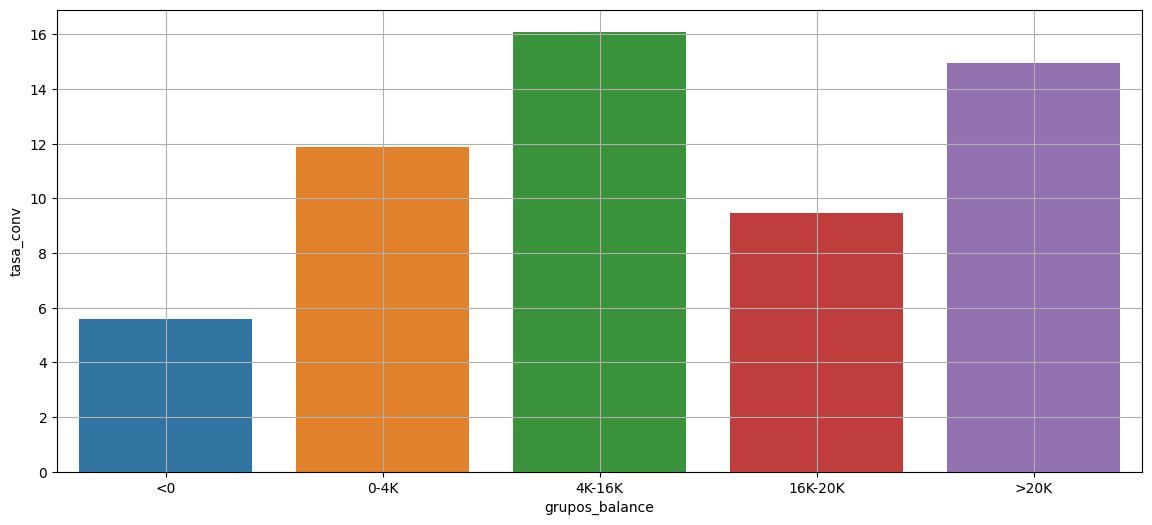

In [37]:
# Generemos el dataset únicamente con estos rangos y observemos el comportamiento

# Nueva columna en el dataset: "grupos_balance"
data.loc[:,'grupos_balance'] = "<0"
data.loc[(data['balance']>=0) & (data['balance']<4000),'grupos_balance'] = "0-4K"
data.loc[(data['balance']>=4000) & (data['balance']<16000),'grupos_balance'] = "4K-16K"
data.loc[(data['balance']>=16000) & (data['balance']<20000),'grupos_balance'] = "16K-20K"
data.loc[data['balance']>=20000,'grupos_balance'] = ">20K"

# Y grafiquemos la tasa de conversión para esta nueva columna
orden = ['<0','0-4K','4K-16K','16K-20K','>20K']
graficar_tasas_conversion('grupos_balance','y_bin',type='bar', order=orden)

In [38]:
# Y eliminemos la columna "balance"
data.drop(columns=['balance'], inplace=True)

Ahora realizaremos un análisis similar pero para las variables categóricas:

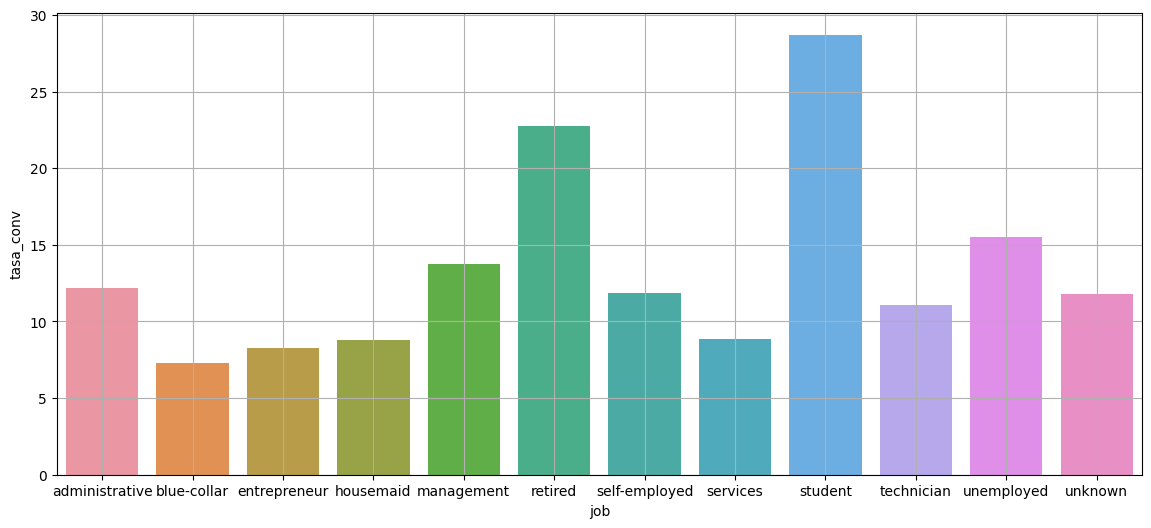

In [39]:
graficar_tasas_conversion('job', 'y_bin', type='bar')

**Observaciones:**

- Las tasas de conversión oscilan entre 8% y 28% aproximadamente
- Los trabajos "retired" y "student" tienen las tasas de conversión más altas (23% y 28%)
- "Job" podría ser una variable predictora

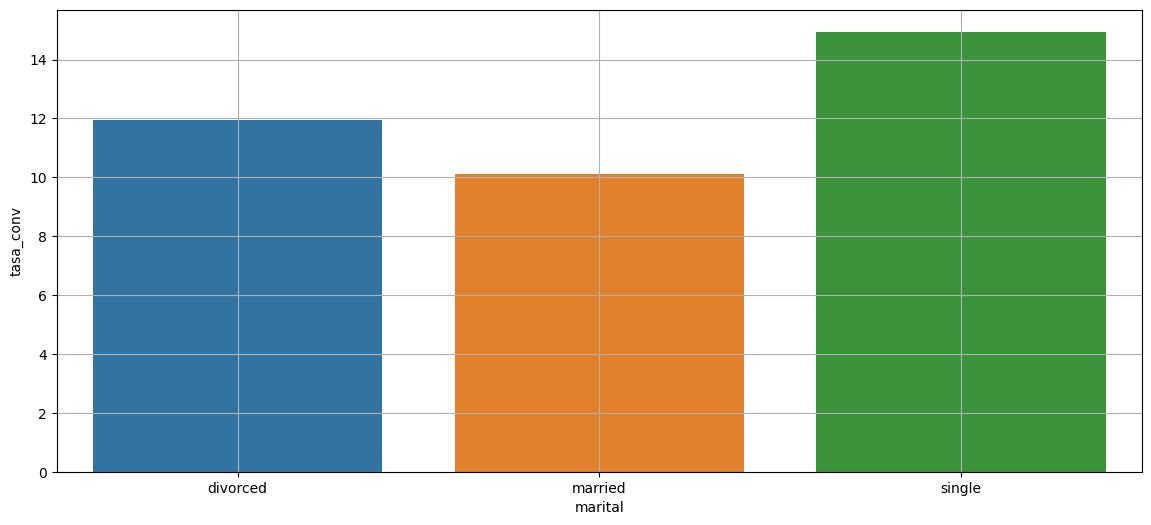

In [40]:
# Marital
graficar_tasas_conversion('marital','y_bin',type='bar')

**Observaciones:**

- Las tasas de conversión son muy similares para los diferentes niveles en la variable "marital"
- "Marital" parece no ser una variable predictora

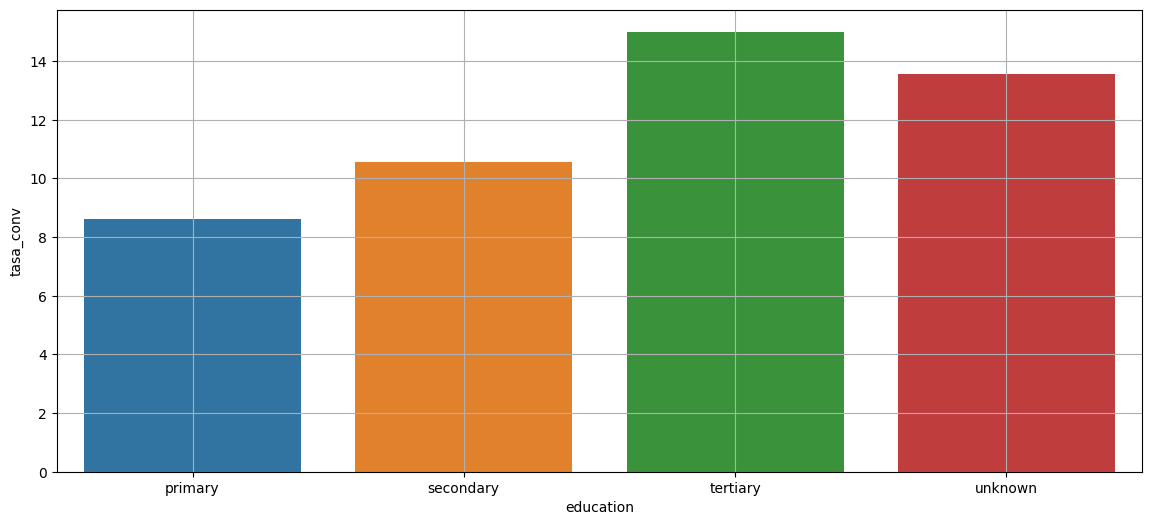

In [41]:
# education
graficar_tasas_conversion('education','y_bin',type='bar')

**Observaciones:**

- Hay un ligero incremento en la tasa de conversión a medida que aumenta el nivel educativo.
- "Education" podría ser una variable predictora

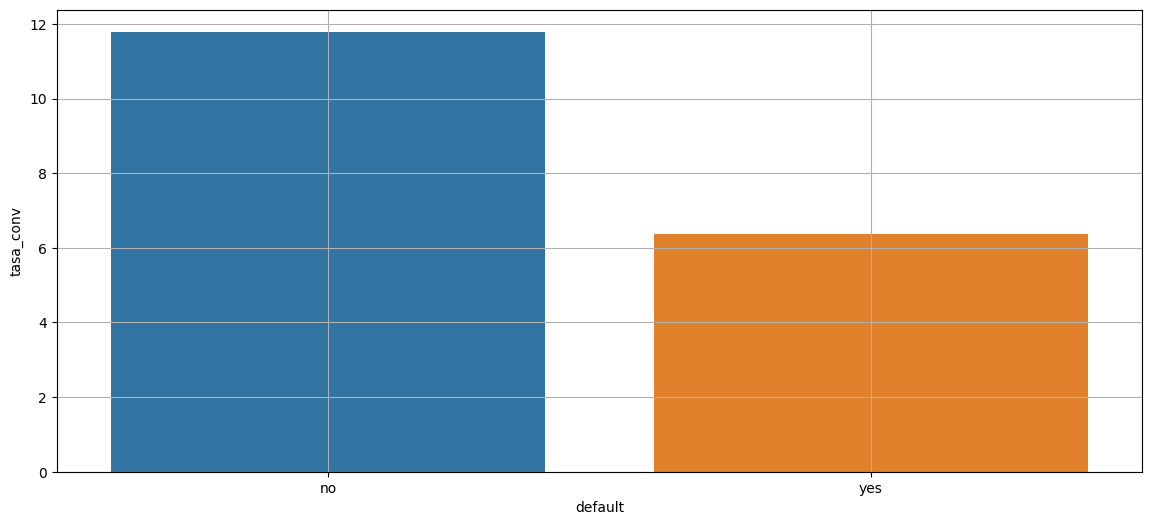

In [43]:
# default
graficar_tasas_conversion('default','y_bin',type='bar')

**Observaciones**:

- Las tasas de conversión para quienes no tienen "default" son de casi el doble para quienes sí lo tienen (12% vs. 6% aproximadamente).
- "Default" podría ser una variable predictora

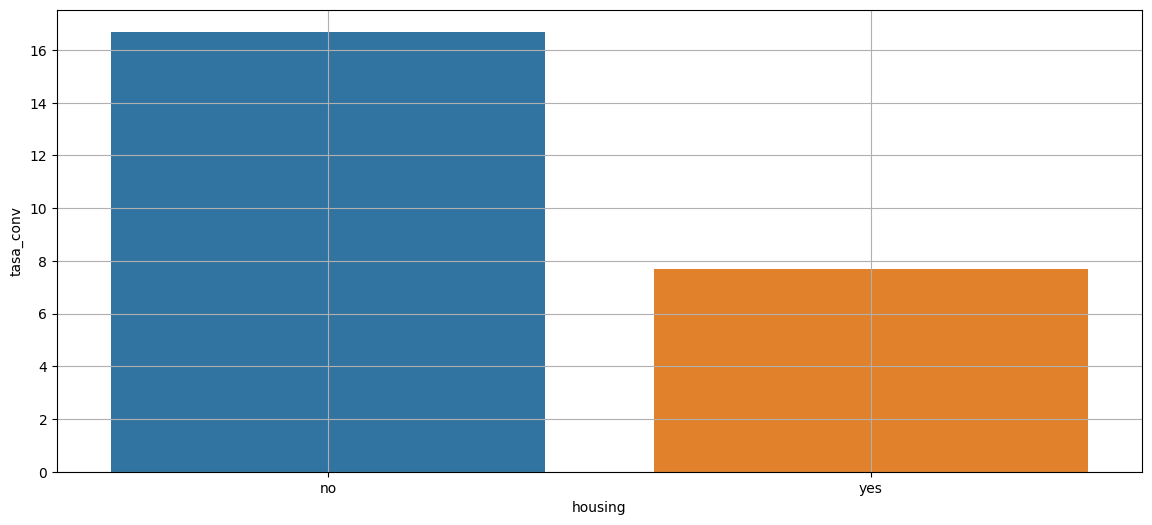

In [44]:
# housing
graficar_tasas_conversion('housing','y_bin',type='bar')

**Observaciones:**

- Quienes no tienen crédito hipotecario ("housing"=no) definitivamente tienen mayores tasas de conversión.
- "Housing" es una variable predictora.

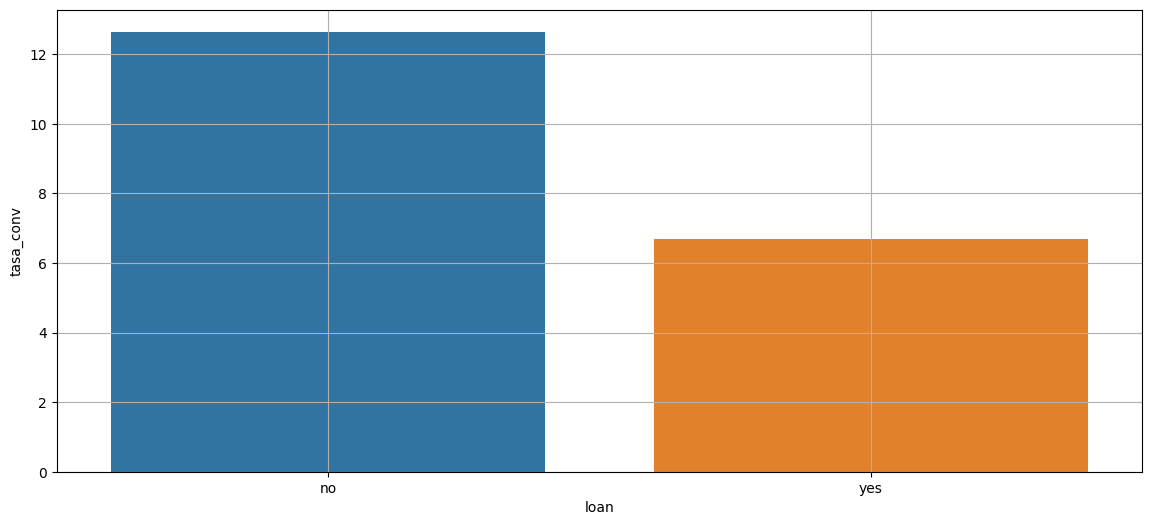

In [45]:
# loan
graficar_tasas_conversion('loan','y_bin',type='bar')

**Observaciones:**

- Con "loan" ocurre algo similar a "housing": quienes NO tienen créditos de consumo presentan definitivamente mayores tasas de conversión
- "Loan" es una variable predictora

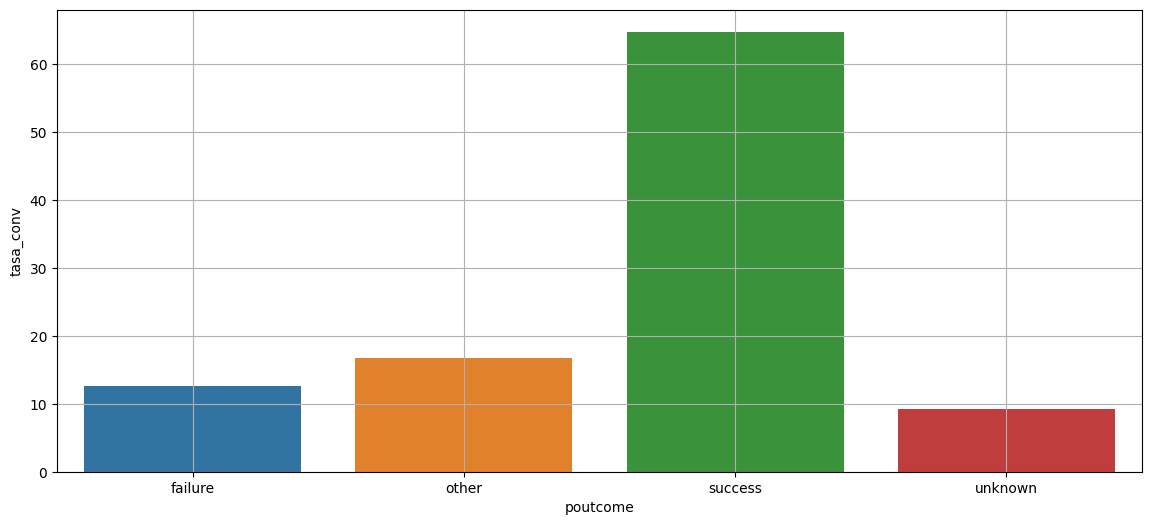

In [46]:
# poutcome
graficar_tasas_conversion('poutcome','y_bin',type='bar')

**Observaciones:**

- Si el cliente adquirió un producto en la campaña anterior (poutcome = success) es más probable que adquiera este nuevo producto con el banco
- poutcome definitivamente es una variable predictora

### Resumen

Las variables predictoras con mayor impacto en la tasa de conversión parecen ser, en orden de importancia

1. poutcome: casi 70% de conversión para el nivel "success"
2. job: con tasas de 22% y 28% para 'retired' y 'student'
2. grupos_balance y grupos_edad, con tasas de conversión cercanas al 16% para varios intervalos
3. default, housing y loan con tasas de conversión entre 12% y 16% para los niveles "no"
4. marital y education, con niveles de conversión comparables con default, housing y loan.

###3 Análisis bivariado

Y podemos ir un paso más allá en este análisis exploratorio y analizar posibles interacciones entre pares de variables predictoras y su impacto en la variable a predecir.

Esto se conoce como análisis bivariado.

Como existen muchas posibles combinaciones analizaremos únicamente los pares con mayor potencial según el orden de importancia definido en el resumen del análisis univariado.

La forma más sencilla de hacer este análisis es a través de gráficas (aunque también se podrían usar herramientas estadísticas más sofisticadas).

⚠️⚠️⚠️ ADVERTENCIA ⚠️⚠️⚠️

De forma similar a como ocurre con el análisis univariado, este análisis nos mostrará sólo una faceta de las posibles relaciones entre pares de variables predictoras y la variable a predecir, y no es suficiente para extraer conclusiones definitivas (aunque nos dará una pista más detallada en comparación con el análisis univariado).

In [47]:
# Tasa de conversión para dos columnas
def graficar_tc_bivariada(col_list, orden=None):
  tc = data.groupby(col_list)['y_bin'].mean().to_frame().reset_index()

  # Gráfica
  plt.figure(figsize=(13,7))
  ax = sns.pointplot(x=tc['y_bin'], y=tc[col_list[0]], hue=tc[col_list[1]], join=False, order=orden)
  ax.yaxis.grid(True)
  ax.xaxis.grid(True)
  plt.title(f'Tasa de conversión para {col_list[0]} y {col_list[1]}')
  plt.xlabel('Tasa de conversión (%)')
  plt.xlim((0,1));

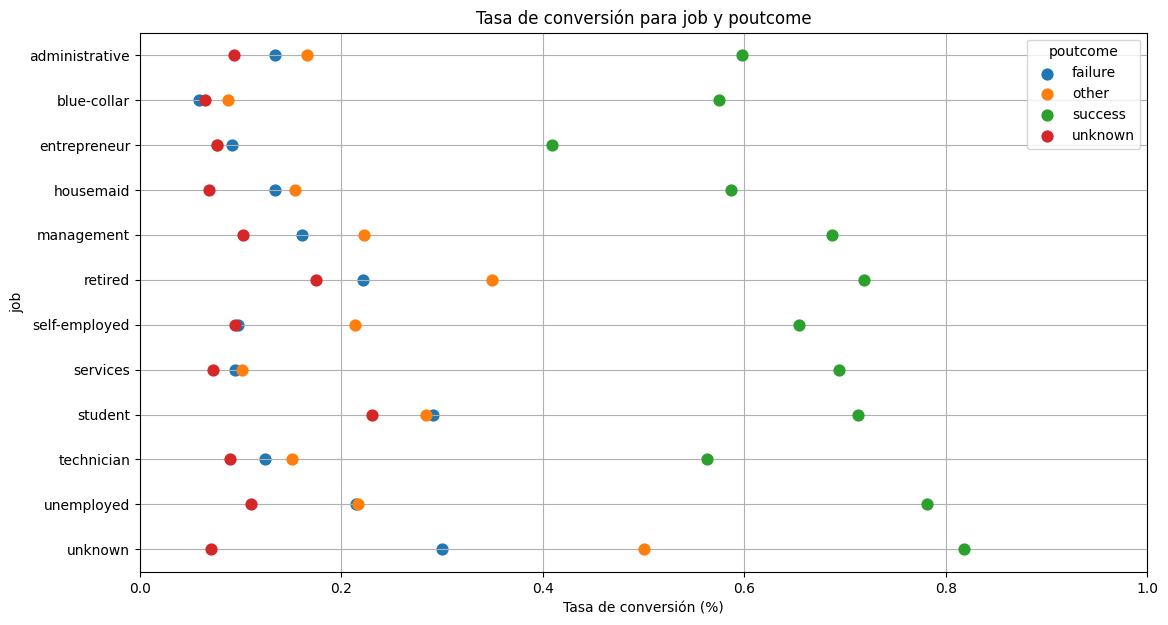

In [48]:
# 1. Par poutcome-job
graficar_tc_bivariada(['job','poutcome'])

# Tasas de conversión superiores al 60% con poutcome==success y
# job = unemployed (78%), student/retired (72%), services (70%), 
# management (68%), self-employed (65%)

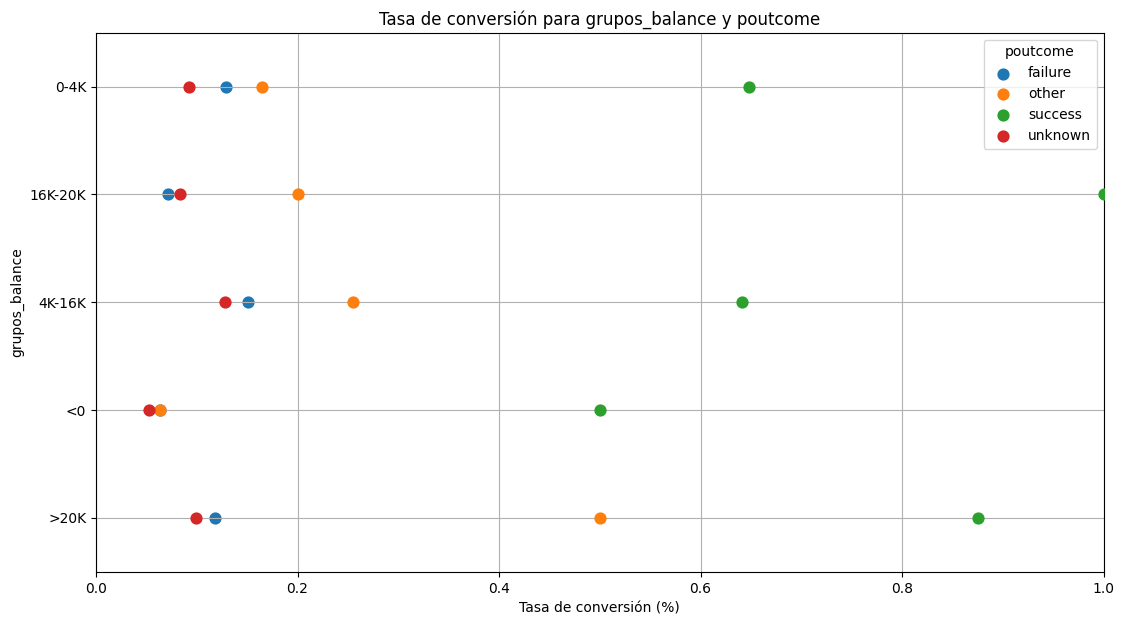

In [49]:
#2. Par poutcome-grupos_balance
graficar_tc_bivariada(['grupos_balance','poutcome'])

# Tasas de conversión superiores al 60% para poutcome=success y
# - Ingresos entre 16K y 20K: 100%!!! Es interesante, pues al analizar sólo 
#   la variable ingresos en este rango se obtienen las menores tasas de conversión
# - Ingresos superiores a 20K: 88%
# - Ingresos entre 0-16K: 65%

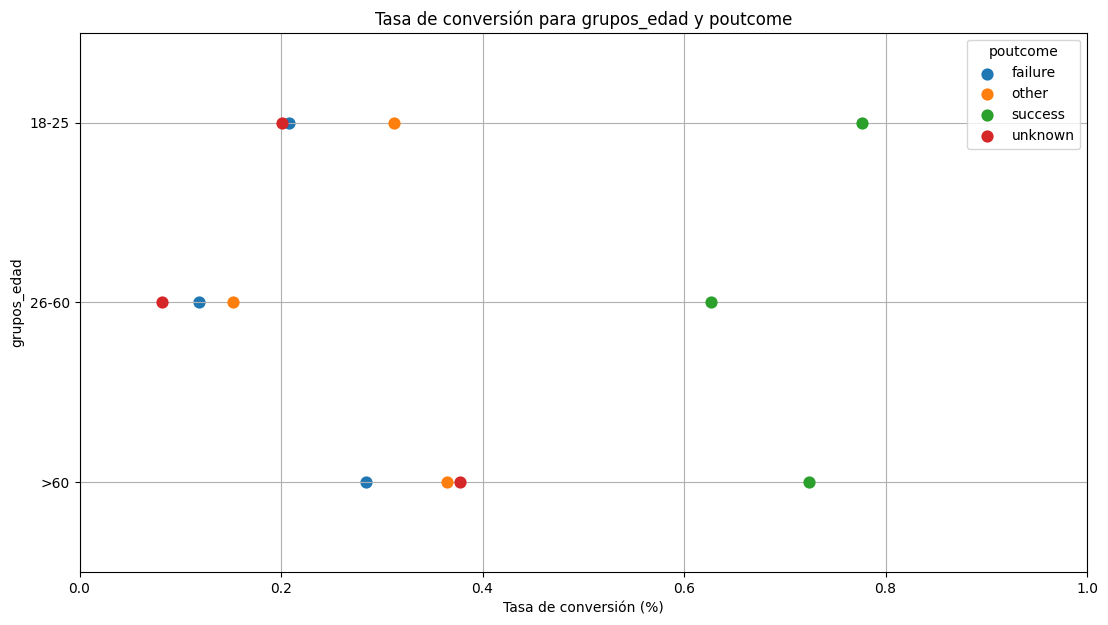

In [50]:
#3. Par poutcome-grupos_edad
graficar_tc_bivariada(['grupos_edad','poutcome'])

# Tasas de conversión superiores al 60% para poutcome=success y
# - Edades 18-25: 78%
# - Edades >60: 72%
# - Edades 26-60: 62%

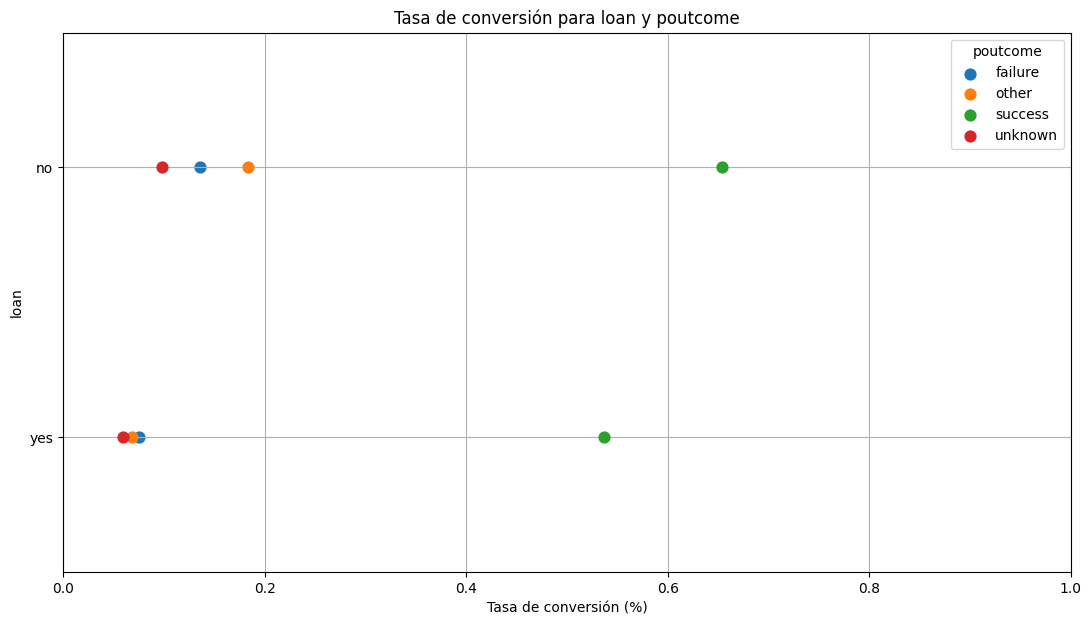

In [51]:
#4. Pares poutcome + default/housing/loan
graficar_tc_bivariada(['loan','poutcome'])

# Se alcanzan tasas de conversión entre 60 y 65% para
# las combinaciones poutcome=success y default/housing/loan=no

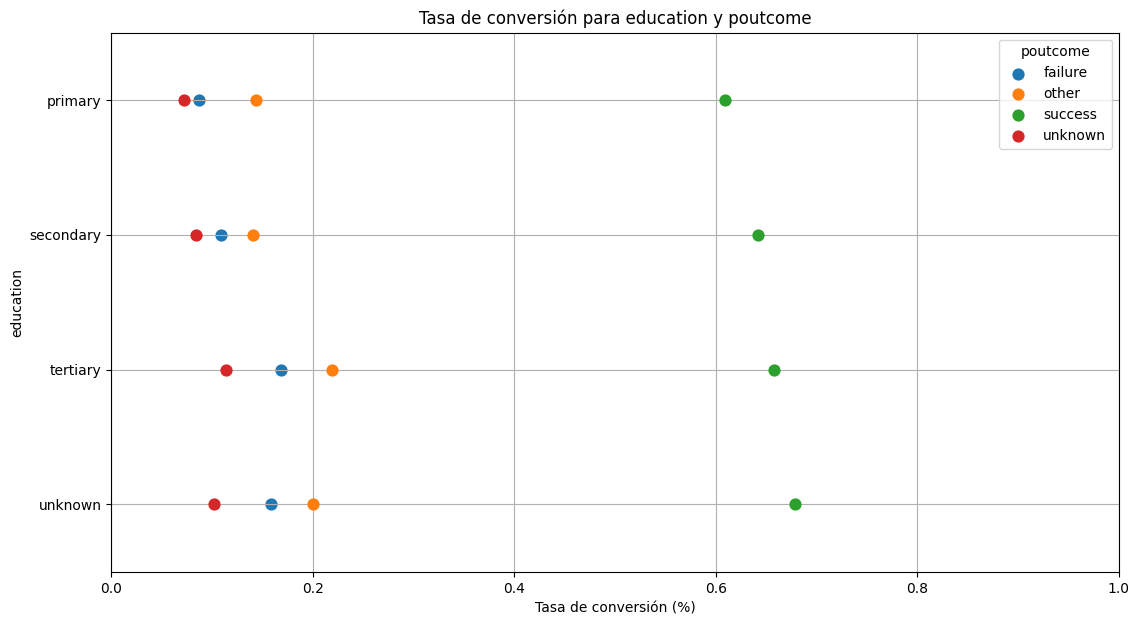

In [52]:
#4. Pares poutcome + marital/education
graficar_tc_bivariada(['education','poutcome'])

# - Se alcanzan tasas de conversión entre 60 y 65% independientemente de "marital"
# - Y lo mismo para "education"

# Estas variables no resultan tan relevantes

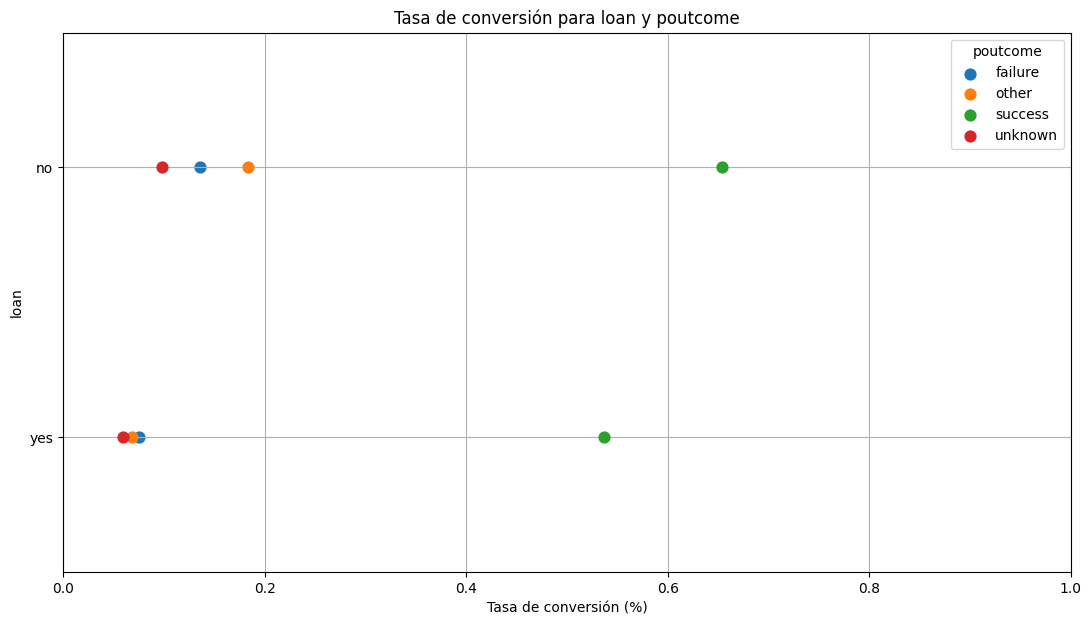

In [53]:
#4. Pares poutcome + default/housing/loan
graficar_tc_bivariada(['loan','poutcome'])

# Se alcanzan tasas de conversión entre 60 y 65% para
# las combinaciones poutcome=success y default/housing/loan=no

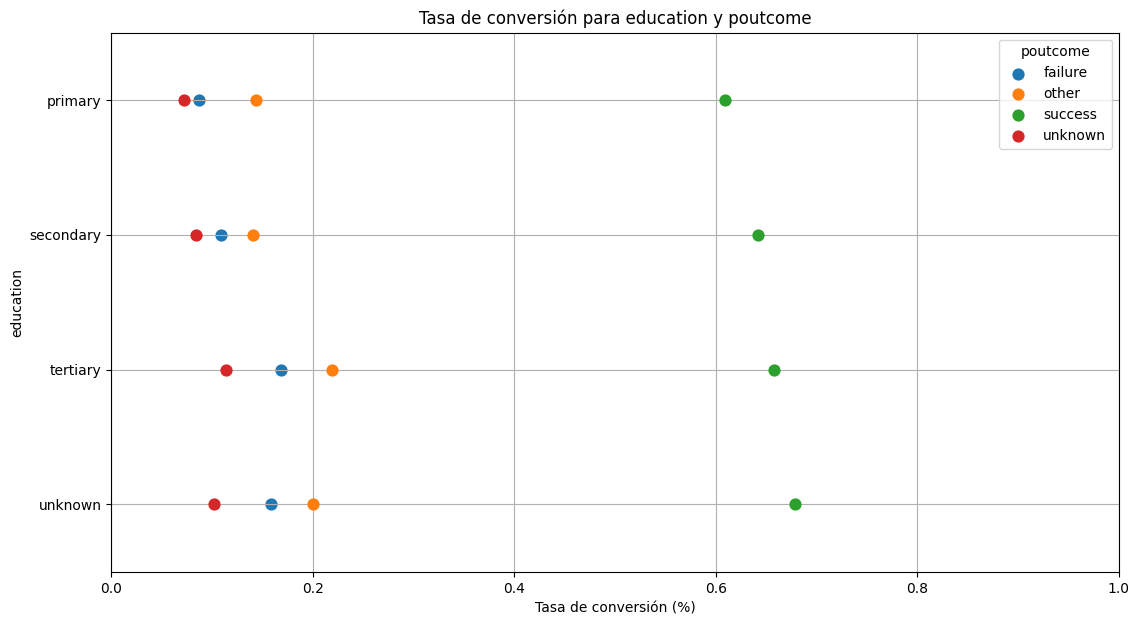

In [54]:
#4. Pares poutcome + marital/education
graficar_tc_bivariada(['education','poutcome'])

# - Se alcanzan tasas de conversión entre 60 y 65% independientemente de "marital"
# - Y lo mismo para "education"

# Estas variables no resultan tan relevantes

# Conclusiones

- La variable "poutcome" seguida de las variables "job", "grupos_balance" y "grupos_edad" son las que tienen mayor impacto en la tasa de conversión.
- Con este análisis el perfil ideal de cliente sería:
    - Debe haber sido contactado previamente por el banco y debe haber adquirido previamente dicho producto (*poutcome == success*)
    - Perfil laboral (top-3): desempleado, estudiante, jubilado
    - Saldo en su cuenta bancaria: entre 16K y 20K (preferiblemente)
    - Edad: entre 18 y 25 años (preferiblemente)
    - Que NO cuente con crédito de consumo, crédito hipotecario o que no haya entrado en "default"


Es posible que la combinación de más de dos variables (análisis multivariado) arroje más luces sobre estos perfiles. Pero en este caso la interpretación de los resultados se dificulta a medida que analizamos de manera simultánea más y más variables.

En este punto el paso a seguir sería usar algún modelo de Machine Learning que permita encontrar esos patrones que no resultan fáciles de ver con este análisis exploratorio.